In [4]:
import pandas as pd


In [5]:
arquivos = ["./canc2023.parquet", "./canc2024.parquet"]
df = pd.concat([pd.read_parquet(arquivo) for arquivo in arquivos], ignore_index=True)

In [6]:
print("Colunas:", df.columns) #Variáveis anteriormente observadas no Dicionário de Dados

Colunas: Index(['TP_NOT', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'ID_AGRAVO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_DIAG', 'SEM_DIAG',
       'ANO_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS',
       'ID_OCUPA_N', 'SIT_TRAB', 'NUTEMPO', 'TPTEMPO', 'CNAE', 'UF_EMP',
       'MUN_EMP', 'TERCEIRIZA', 'NUTEMPORIS', 'TPTEMPORIS', 'REGIME',
       'DIAG_ESP', 'ASBESTO', 'SILICA', 'AMINA', 'BENZENO', 'ALCATRAO',
       'HIDROCARBO', 'OLEOS', 'BERILIO', 'CADMIO', 'CROMO', 'NIQUEL',
       'IONIZANTES', 'NAO_IONIZA', 'HORMONIO', 'NEOPLASICO', 'OUTRO_EXP',
       'FUMA', 'TEMPO_FUMA', 'TP_TEMP_FU', 'TRAB_DOE', 'EVOLUCAO', 'DT_OBITO',
       'CAT', 'OUT_EXP_DE', 'DT_DIGITA', 'DT_TRANSUS', 'DT_TRANSDM',
       'DT_TRANSSM', 'DT_TRNASRM', 'DT_TRANSRS', 'DT_TRANSSE', 'NU_LOTE_V',
       'NU_LOTE_H'],
      dtype='object')


In [7]:
print(df.isnull().sum()) #verificando dados nulos

TP_NOT        0
DT_NOTIFIC    0
SEM_NOT       0
NU_ANO        0
ID_AGRAVO     0
             ..
DT_TRNASRM    0
DT_TRANSRS    0
DT_TRANSSE    0
NU_LOTE_V     0
NU_LOTE_H     0
Length: 66, dtype: int64


In [8]:
print(df.duplicated().sum()) #verificando duplicidade

1


In [9]:
df[df.duplicated()] #mostra a linha que está duplicada

,TP_NOT,DT_NOTIFIC,SEM_NOT,NU_ANO,ID_AGRAVO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_DIAG,...,OUT_EXP_DE,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRNASRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H
2057,2,20240524,202421,2024,C80,42,420190,1478,2377128,20240510,...,,20240524,,,,,,,0000000,


In [10]:
print("Quantidade de linhas:", len(df))
print("Quantidade de variáveis:", df.shape[1])

Quantidade de linhas: 2241
Quantidade de variáveis: 66


In [11]:
print(df.dtypes)

TP_NOT        object
DT_NOTIFIC    object
SEM_NOT       object
NU_ANO        object
ID_AGRAVO     object
               ...  
DT_TRNASRM    object
DT_TRANSRS    object
DT_TRANSSE    object
NU_LOTE_V     object
NU_LOTE_H     object
Length: 66, dtype: object


In [12]:
df.head(10)

,TP_NOT,DT_NOTIFIC,SEM_NOT,NU_ANO,ID_AGRAVO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_DIAG,...,OUT_EXP_DE,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRNASRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H
0,2,20230102,202301,2023,C80,33,330455,,2273454,20230102,...,,20240112,,,,,,,0000000,
1,2,20230103,202301,2023,C80,23,230440,1519,3919838,20150525,...,EM INVESTIGACAO,20230103,20230104,,20230127,,,,0000000,
2,2,20230103,202301,2023,C80,52,520870,1779,6048196,20220602,...,ASGROTOXICOS,20230329,,,,,,,0000000,
3,2,20230104,202301,2023,C80,33,330414,,6423329,20230104,...,,20230123,,,,,,,0000000,
4,2,20230104,202301,2023,C80,33,330414,,6423329,20230104,...,,20230123,,,,,,,0000000,
5,2,20230104,202301,2023,C80,33,330414,,6423329,20230104,...,,20230123,,,,,,,0000000,
6,2,20230104,202301,2023,C80,11,110020,1483,2493918,20220509,...,,20230113,,,,,,,0000000,
7,2,20230105,202301,2023,C80,33,330414,,6423329,20221223,...,,20230123,,,,,,,0000000,
8,2,20230105,202301,2023,C80,24,240810,1416,8004684,20230105,...,TINTA,20230105,,,,,,,0000000,
9,2,20230109,202302,2023,C80,33,330455,,2273454,20230109,...,,20240112,,,,,,,0000000,


In [36]:
if df["DT_TRANSDM"].isna().all():
    print("A coluna DT_TRANSDM está completamente vazia (só contém valores nulos).")
else:
    print("A coluna DT_TRANSDM tem pelo menos um valor preenchido.")


A coluna DT_TRANSDM tem pelo menos um valor preenchido.


In [13]:
print(df.describe())

       TP_NOT DT_NOTIFIC SEM_NOT NU_ANO ID_AGRAVO SG_UF_NOT ID_MUNICIP  \
count    2241       2241    2241   2241      2241      2241       2241   
unique      1        399      89      2         1        19        307   
top         2   20231116  202349   2023     C80          31     410690   
freq     2241         60     100   1616      2241      1162        194   

       ID_REGIONA ID_UNIDADE   DT_DIAG  ...                      OUT_EXP_DE  \
count        2241       2241      2241  ...                            2241   
unique         83        429      1317  ...                             413   
top      1455        2077434  20230215  ...                                   
freq          275        129         8  ...                            1339   

       DT_DIGITA DT_TRANSUS DT_TRANSDM DT_TRANSSM DT_TRNASRM DT_TRANSRS  \
count       2241       2241       2241       2241       2241       2241   
unique       349         27          3        150          1          6   
top     

In [14]:
#Retorna a frequencia de valores de uma variável
print(df["EVOLUCAO"].head(10))
contagem = df["EVOLUCAO"].value_counts()
print(contagem)

0     
1    1
2    4
3     
4    9
5    9
6    1
7    9
8    3
9     
Name: EVOLUCAO, dtype: object
EVOLUCAO
3    611
4    350
1    339
     293
9    191
2    147
6    116
7    114
8     58
5     22
Name: count, dtype: int64


FUMA          0.294085
NAO_IONIZA    0.292340
BERILIO       0.247328
IONIZANTES    0.246395
HORMONIO      0.245688
OLEOS         0.245012
ALCATRAO      0.244092
CROMO         0.243191
AMINA         0.243031
NEOPLASICO    0.243012
CADMIO        0.241929
ASBESTO       0.240090
NIQUEL        0.236973
BENZENO       0.235709
HIDROCARBO    0.235419
OUTRO_EXP     0.234377
SILICA        0.233868
Name: EVOLUCAO, dtype: float64


C:\Users\Samuel\AppData\Local\Temp\ipykernel_3316\432371504.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes.values, y=correlacoes.index, palette='viridis')


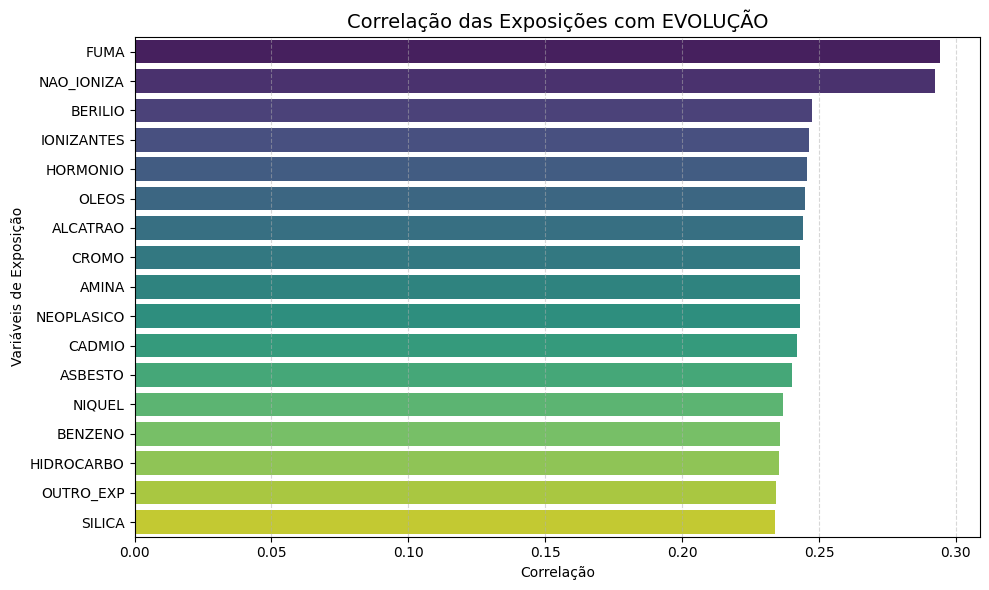

In [15]:
from sklearn.preprocessing import LabelEncoder

# Cria uma cópia só com as variáveis que importam
variaveis_exposicao = ['ASBESTO', 'SILICA', 'AMINA', 'BENZENO', 'ALCATRAO',
                       'HIDROCARBO', 'OLEOS', 'BERILIO', 'CADMIO', 'CROMO',
                       'NIQUEL', 'IONIZANTES', 'NAO_IONIZA', 'HORMONIO',
                       'NEOPLASICO', 'OUTRO_EXP', 'FUMA', 'EVOLUCAO']

dados = df[variaveis_exposicao].copy()

# Codifica tudo com LabelEncoder
le = LabelEncoder()
for col in dados.columns:
    dados[col] = le.fit_transform(dados[col].astype(str))  # Garante que tudo seja string

# Agora calcula a correlação com EVOLUCAO
correlacoes = dados.corr()['EVOLUCAO'].drop('EVOLUCAO').sort_values(ascending=False)
print(correlacoes)

import matplotlib.pyplot as plt
import seaborn as sns

# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacoes.values, y=correlacoes.index, palette='viridis')

plt.title('Correlação das Exposições com EVOLUÇÃO', fontsize=14)
plt.xlabel('Correlação')
plt.ylabel('Variáveis de Exposição')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\Samuel\AppData\Local\Temp\ipykernel_3316\1848209285.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados['DT_OBITO'] = pd.to_datetime(dados['DT_OBITO'], errors='coerce')
C:\Users\Samuel\AppData\Local\Temp\ipykernel_3316\1848209285.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes.values, y=correlacoes.index, palette='magma')


NAO_IONIZA   -0.015704
HIDROCARBO   -0.035786
CADMIO       -0.040492
AMINA        -0.043221
NIQUEL       -0.043602
BERILIO      -0.043752
HORMONIO     -0.044738
OLEOS        -0.045020
SILICA       -0.045414
ASBESTO      -0.046039
NEOPLASICO   -0.046812
ALCATRAO     -0.048138
CROMO        -0.049331
BENZENO      -0.050328
IONIZANTES   -0.061730
OUTRO_EXP    -0.067628
FUMA         -0.094211
Name: DT_OBITO_NUM, dtype: float64


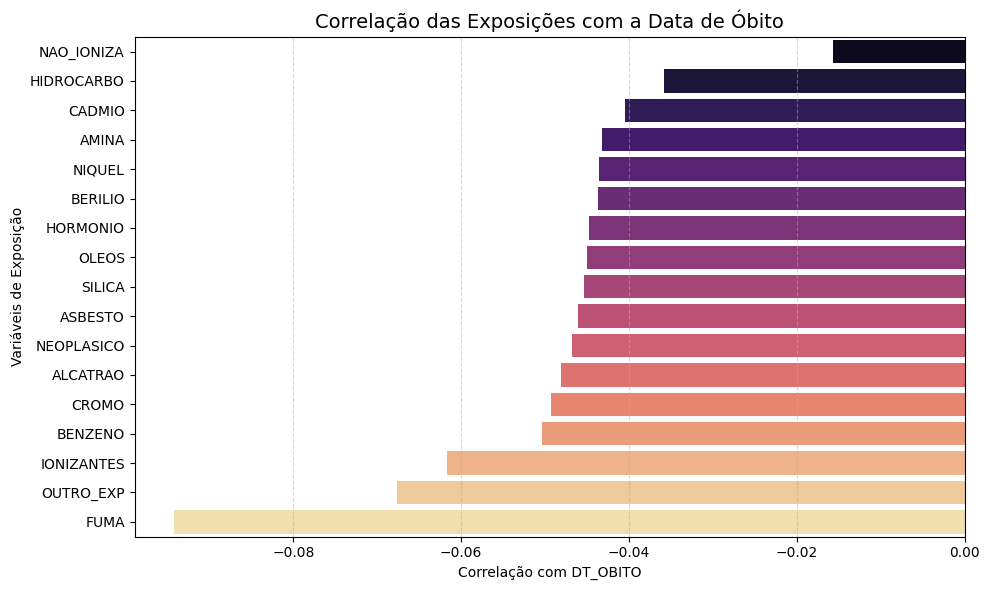

In [16]:

from sklearn.preprocessing import LabelEncoder
# Define as variáveis de exposição + DT_OBITO
variaveis_exposicao = ['ASBESTO', 'SILICA', 'AMINA', 'BENZENO', 'ALCATRAO',
                       'HIDROCARBO', 'OLEOS', 'BERILIO', 'CADMIO', 'CROMO',
                       'NIQUEL', 'IONIZANTES', 'NAO_IONIZA', 'HORMONIO',
                       'NEOPLASICO', 'OUTRO_EXP', 'FUMA', 'DT_OBITO']

dados = df[variaveis_exposicao].copy()

# Converte DT_OBITO para datetime e depois para número (timestamp)
dados['DT_OBITO'] = pd.to_datetime(dados['DT_OBITO'], errors='coerce')
dados['DT_OBITO_NUM'] = dados['DT_OBITO'].astype('int64')  # em nanossegundos

# Remove colunas de data original, só usamos a versão numérica
dados = dados.drop(columns='DT_OBITO')

# Codifica as variáveis categóricas
le = LabelEncoder()
for col in dados.columns:
    if dados[col].dtype == 'object':
        dados[col] = le.fit_transform(dados[col].astype(str))

# Calcula correlação com a versão numérica de DT_OBITO
correlacoes = dados.corr()['DT_OBITO_NUM'].drop('DT_OBITO_NUM').sort_values(ascending=False)
print(correlacoes)

# Plota gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacoes.values, y=correlacoes.index, palette='magma')
plt.title('Correlação das Exposições com a Data de Óbito', fontsize=14)
plt.xlabel('Correlação com DT_OBITO')
plt.ylabel('Variáveis de Exposição')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\Samuel\AppData\Local\Temp\ipykernel_3316\910653882.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EVOLUCAO', y='NUTEMPO', data=dados, palette='Set2')


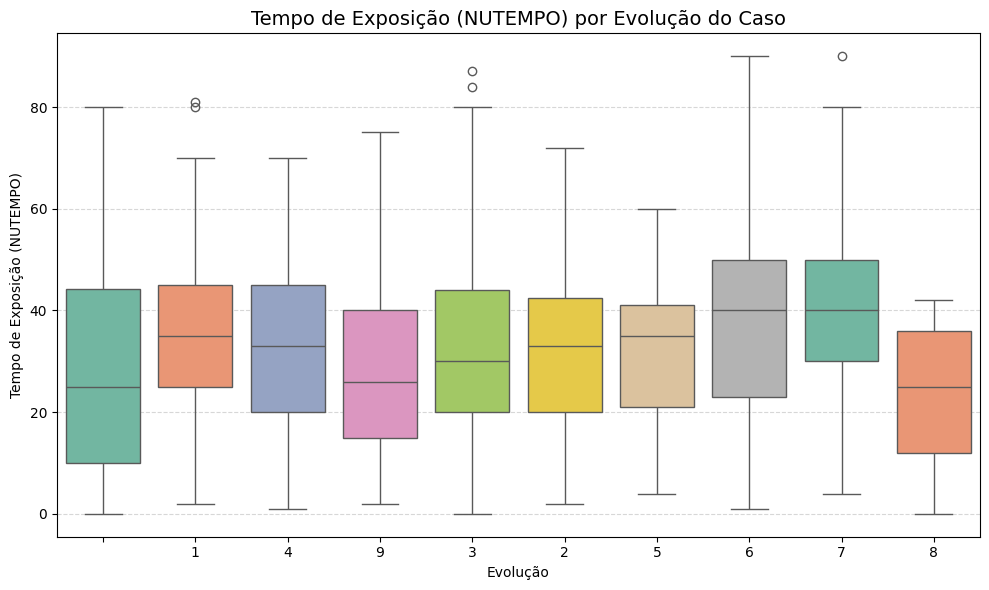

In [17]:
# Garante que NUTEMPO seja numérico
df['NUTEMPO'] = pd.to_numeric(df['NUTEMPO'], errors='coerce')

# Remove nulos
dados = df.dropna(subset=['EVOLUCAO', 'NUTEMPO'])

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='EVOLUCAO', y='NUTEMPO', data=dados, palette='Set2')

plt.title('Tempo de Exposição (NUTEMPO) por Evolução do Caso', fontsize=14)
plt.xlabel('Evolução')
plt.ylabel('Tempo de Exposição (NUTEMPO)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


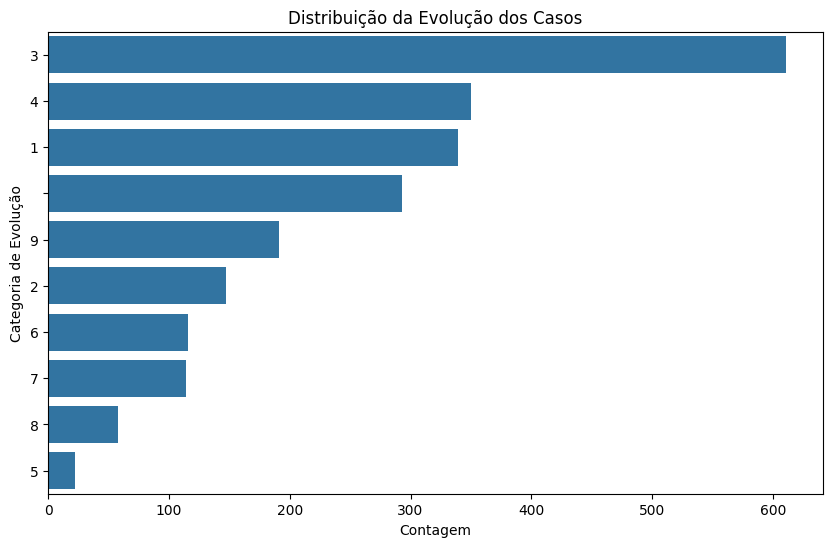

In [18]:
#Distribuição da variável-alvo (EVOLUCAO)
plt.figure(figsize=(10, 6))
sns.countplot(y=df["EVOLUCAO"], order=df["EVOLUCAO"].value_counts().index)
plt.title("Distribuição da Evolução dos Casos")
plt.xlabel("Contagem")
plt.ylabel("Categoria de Evolução")
df['EVOLUCAO'] = df['EVOLUCAO'].str.strip()  # Remove espaços antes/depois
df = df[df['EVOLUCAO'] != ' ']  # Remove registros vazios
plt.show()

#Esse gráfico mostra a distribuição dos casos de câncer ocupacional de acordo com a evolução da doença.
# 3 - Doença estável
# 4 - Doença em progressão
# 1 - Sem evidência da doença
# 9 - Ignorado
# 2 - Remissão parcial
# 6 - Óbito por cancêr relacionado ao trabalho
# 7 - Óbito por outras causas
# 8 - Não se aplica
# 5 - Fora de possibilidade terapêutica

#Isso sugere que a maioria dos pacientes está com a doença estabilizada ou progredindo, enquanto poucos estão sem possibilidade de tratamento.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

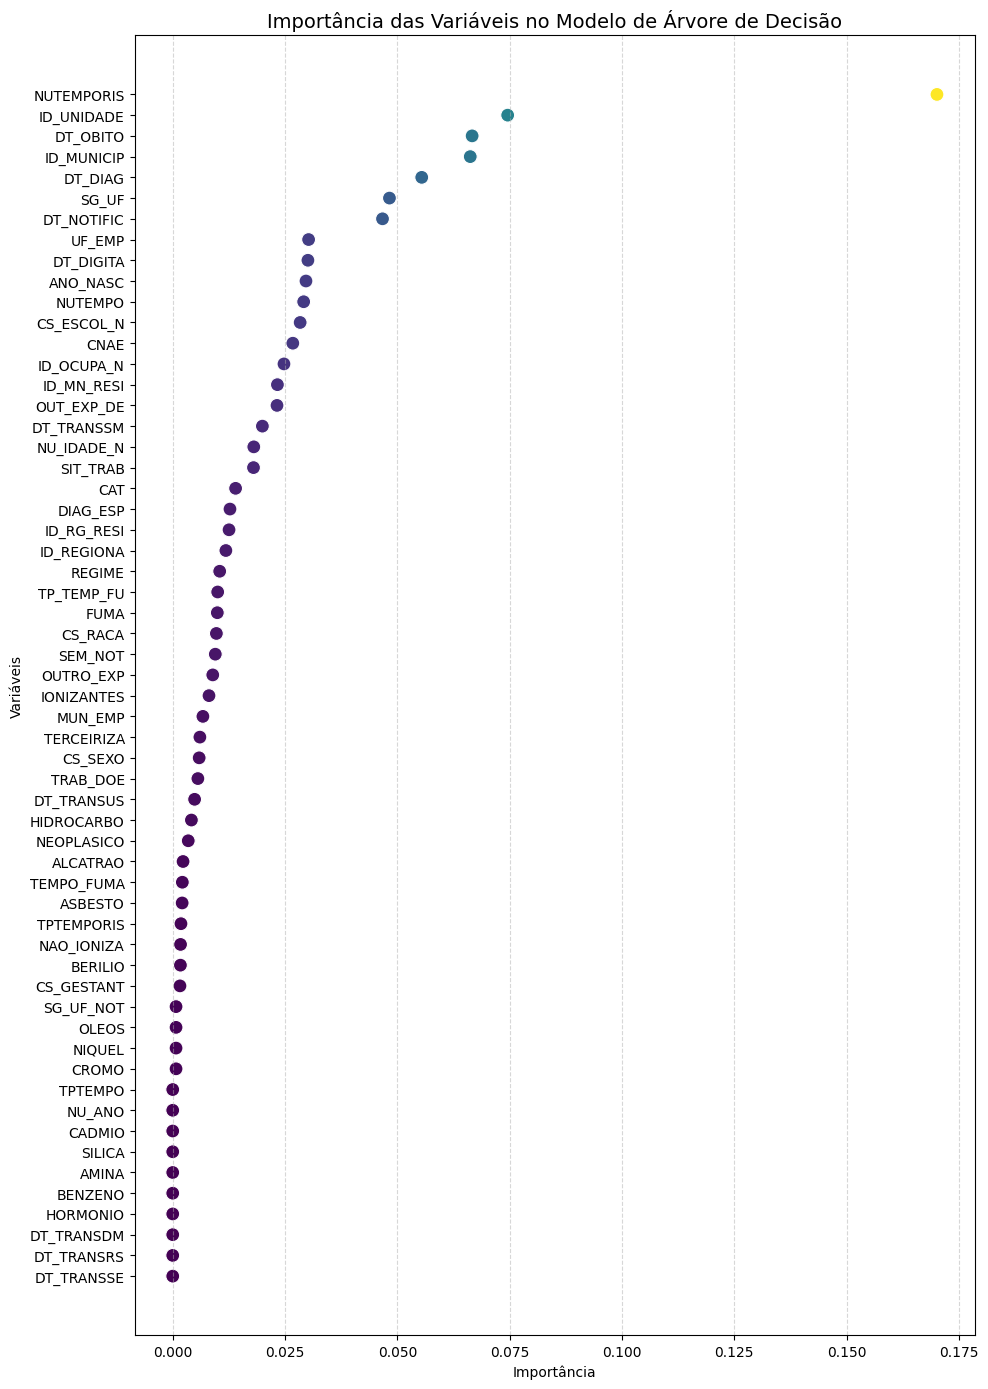

Variáveis mais importantes para a evolução:
      Variável  Importância
25  NUTEMPORIS     0.170098
6   ID_UNIDADE     0.074549
49    DT_OBITO     0.066635
4   ID_MUNICIP     0.066219
7      DT_DIAG     0.055422
14       SG_UF     0.048237
0   DT_NOTIFIC     0.046691
22      UF_EMP     0.030240
52   DT_DIGITA     0.030090
8     ANO_NASC     0.029656
19     NUTEMPO     0.029141
13  CS_ESCOL_N     0.028356
21        CNAE     0.026728
17  ID_OCUPA_N     0.024757
15  ID_MN_RESI     0.023300
51  OUT_EXP_DE     0.023207
55  DT_TRANSSM     0.019955
9   NU_IDADE_N     0.018040
18    SIT_TRAB     0.017974
50         CAT     0.013991
28    DIAG_ESP     0.012741
16  ID_RG_RESI     0.012530
5   ID_REGIONA     0.011829
27      REGIME     0.010451
47  TP_TEMP_FU     0.010004
45        FUMA     0.009924
12     CS_RACA     0.009716
1      SEM_NOT     0.009474
44   OUTRO_EXP     0.008908
40  IONIZANTES     0.008069
23     MUN_EMP     0.006716
24  TERCEIRIZA     0.006046
10     CS_SEXO     0.005882
48  

In [20]:
# Criar cópia do dataset e remover valores nulos
df_filtered = df.dropna()

# ✅ Converter tempo de exposição em dias
if "nu_tempo_exposicao_risco" in df.columns and "tp_tempo_exposicao_risco" in df.columns:
    conversion_factors = {
        "Hora": 1 / 24,
        "Dia": 1,
        "Meses": 30,
        "Anos": 365
    }
    df_filtered["tempo_exposicao_dias"] = df_filtered["nu_tempo_exposicao_risco"] * df_filtered["tp_tempo_exposicao_risco"].map(conversion_factors)
    df_filtered.drop(columns=["nu_tempo_exposicao_risco", "tp_tempo_exposicao_risco"], inplace=True)

# ✅ Remover colunas irrelevantes
df_filtered = df_filtered.loc[:, df_filtered.nunique() > 1]

# ✅ Tratar variáveis categóricas
categorical_cols = df_filtered.select_dtypes(exclude=["number"]).columns.tolist()
le = LabelEncoder()
for col in categorical_cols:
    df_filtered[col] = le.fit_transform(df_filtered[col].astype(str))

# ✅ Definir X (features) e y (variável alvo)
target_variable = "EVOLUCAO"
if target_variable in df_filtered.columns:
    X = df_filtered.drop(columns=[target_variable])
    y = df_filtered[target_variable]

    # ✅ Dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ✅ Treinar um modelo de Árvore de Decisão
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # ✅ Importância das variáveis
    feature_importance_df = pd.DataFrame({
        'Variável': X.columns,
        'Importância': model.feature_importances_
    }).sort_values(by="Importância", ascending=False)

    # ✅ Novo gráfico tipo "dot plot"
    plt.figure(figsize=(10, 14))
    sns.scatterplot(
        x="Importância",
        y="Variável",
        data=feature_importance_df,
        hue="Importância",
        palette="viridis",
        legend=False,
        s=100
    )
    plt.title("Importância das Variáveis no Modelo de Árvore de Decisão", fontsize=14)
    plt.xlabel("Importância")
    plt.ylabel("Variáveis")
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # ✅ Print tabela
    print("Variáveis mais importantes para a evolução:")
    print(feature_importance_df)
else:
    print(f"Erro: A variável alvo '{target_variable}' não foi encontrada no DataFrame.")


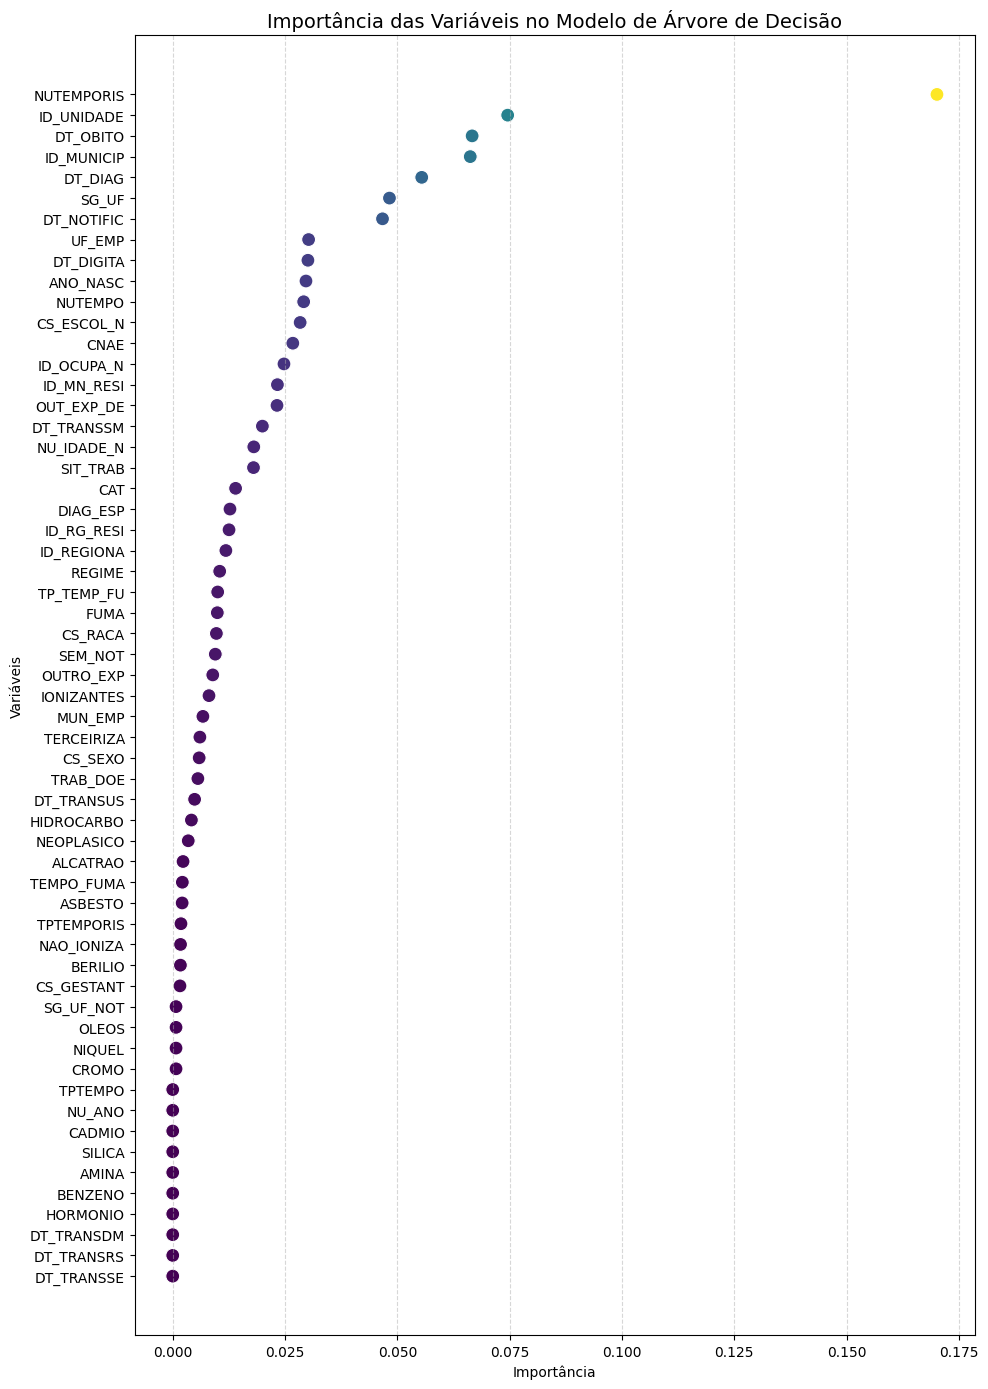

Variáveis mais importantes para a evolução:
      Variável  Importância
25  NUTEMPORIS     0.170098
6   ID_UNIDADE     0.074549
49    DT_OBITO     0.066635
4   ID_MUNICIP     0.066219
7      DT_DIAG     0.055422
14       SG_UF     0.048237
0   DT_NOTIFIC     0.046691
22      UF_EMP     0.030240
52   DT_DIGITA     0.030090
8     ANO_NASC     0.029656
19     NUTEMPO     0.029141
13  CS_ESCOL_N     0.028356
21        CNAE     0.026728
17  ID_OCUPA_N     0.024757
15  ID_MN_RESI     0.023300
51  OUT_EXP_DE     0.023207
55  DT_TRANSSM     0.019955
9   NU_IDADE_N     0.018040
18    SIT_TRAB     0.017974
50         CAT     0.013991
28    DIAG_ESP     0.012741
16  ID_RG_RESI     0.012530
5   ID_REGIONA     0.011829
27      REGIME     0.010451
47  TP_TEMP_FU     0.010004
45        FUMA     0.009924
12     CS_RACA     0.009716
1      SEM_NOT     0.009474
44   OUTRO_EXP     0.008908
40  IONIZANTES     0.008069
23     MUN_EMP     0.006716
24  TERCEIRIZA     0.006046
10     CS_SEXO     0.005882
48  

In [21]:
# Criar cópia do dataset e remover valores nulos
df_filtered = df.dropna()

# ✅ Converter tempo de exposição em dias
if "nu_tempo_exposicao_risco" in df.columns and "tp_tempo_exposicao_risco" in df.columns:
    conversion_factors = {
        "Hora": 1 / 24,
        "Dia": 1,
        "Meses": 30,
        "Anos": 365
    }
    df_filtered["tempo_exposicao_dias"] = df_filtered["nu_tempo_exposicao_risco"] * df_filtered["tp_tempo_exposicao_risco"].map(conversion_factors)
    df_filtered.drop(columns=["nu_tempo_exposicao_risco", "tp_tempo_exposicao_risco"], inplace=True)

# ✅ Remover colunas irrelevantes
df_filtered = df_filtered.loc[:, df_filtered.nunique() > 1]

# ✅ Tratar variáveis categóricas
categorical_cols = df_filtered.select_dtypes(exclude=["number"]).columns.tolist()
le = LabelEncoder()
for col in categorical_cols:
    df_filtered[col] = le.fit_transform(df_filtered[col].astype(str))

# ✅ Definir X (features) e y (variável alvo)
target_variable = "EVOLUCAO"
if target_variable in df_filtered.columns:
    X = df_filtered.drop(columns=[target_variable])
    y = df_filtered[target_variable]

    # ✅ Dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ✅ Treinar um modelo de Árvore de Decisão
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # ✅ Importância das variáveis
    feature_importance_df = pd.DataFrame({
        'Variável': X.columns,
        'Importância': model.feature_importances_
    }).sort_values(by="Importância", ascending=False)

    # ✅ Novo gráfico tipo "dot plot"
    plt.figure(figsize=(10, 14))
    sns.scatterplot(
        x="Importância",
        y="Variável",
        data=feature_importance_df,
        hue="Importância",
        palette="viridis",
        legend=False,
        s=100
    )
    plt.title("Importância das Variáveis no Modelo de Árvore de Decisão", fontsize=14)
    plt.xlabel("Importância")
    plt.ylabel("Variáveis")
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # ✅ Print tabela
    print("Variáveis mais importantes para a evolução:")
    print(feature_importance_df)
else:
    print(f"Erro: A variável alvo '{target_variable}' não foi encontrada no DataFrame.")


C:\Users\Samuel\AppData\Local\Temp\ipykernel_3316\2352152620.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


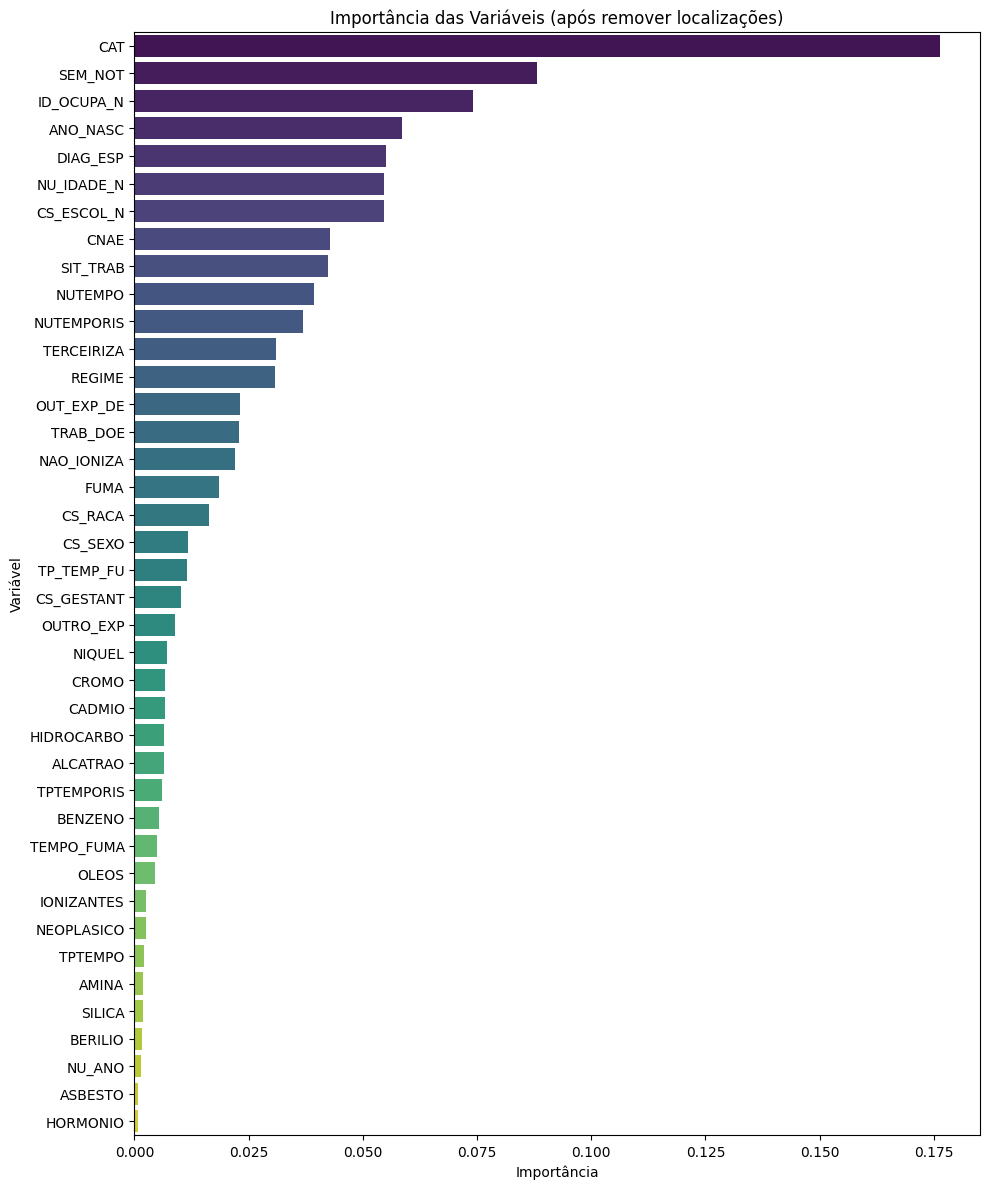

Top variáveis preditoras da evolução (sem dados geográficos):
      Variável  Importância
38         CAT     0.176302
0      SEM_NOT     0.088037
8   ID_OCUPA_N     0.074097
2     ANO_NASC     0.058676
17    DIAG_ESP     0.055086
3   NU_IDADE_N     0.054675
7   CS_ESCOL_N     0.054622
12        CNAE     0.042889
9     SIT_TRAB     0.042431
10     NUTEMPO     0.039288


In [22]:
# 🔹 Copiar o DataFrame e tratar valores nulos
df_filtered = df.dropna().copy()

# 🔹 Converter tempo de exposição para dias, se aplicável
if "nu_tempo_exposicao_risco" in df.columns and "tp_tempo_exposicao_risco" in df.columns:
    conversion_factors = {
        "Hora": 1 / 24,
        "Dia": 1,
        "Meses": 30,
        "Anos": 365
    }
    df_filtered["tempo_exposicao_dias"] = df_filtered["nu_tempo_exposicao_risco"] * df_filtered["tp_tempo_exposicao_risco"].map(conversion_factors)
    df_filtered.drop(columns=["nu_tempo_exposicao_risco", "tp_tempo_exposicao_risco"], inplace=True)

# 🔹 Remover colunas que não variam
df_filtered = df_filtered.loc[:, df_filtered.nunique() > 1]

# 🔹 Codificar variáveis categóricas
categorical_cols = df_filtered.select_dtypes(exclude=["number"]).columns.tolist()
le = LabelEncoder()
for col in categorical_cols:
    df_filtered[col] = le.fit_transform(df_filtered[col].astype(str))

# 🔹 Remover variáveis de localização ou identificação
variaveis_remover = [
    "ID_MUNICIP", "ID_UNIDADE", "SG_UF", "ID_REGIONA", "ID_MN_RESI", "ID_RG_RESI",
    "UF_EMP", "SG_UF_NOT", "MUN_EMP", "DT_NOTIFIC", "DT_DIAG", "DT_DIGITA",
    "DT_OBITO", "DT_TRANSUS", "DT_TRANSDM", "DT_TRANSSM", "DT_TRANSRS", "DT_TRANSSE"
]

df_filtered = df_filtered.drop(columns=[col for col in variaveis_remover if col in df_filtered.columns])

# 🔹 Definir variável alvo
target_variable = "EVOLUCAO"
if target_variable in df_filtered.columns:
    X = df_filtered.drop(columns=[target_variable])
    y = df_filtered[target_variable]

    # 🔹 Dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 🔹 Treinar modelo
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # 🔹 Importância das variáveis
    feature_importance_df = pd.DataFrame({
        "Variável": X.columns,
        "Importância": model.feature_importances_
    }).sort_values(by="Importância", ascending=False)

    # 🔹 Plotar gráfico limpo com Seaborn
    plt.figure(figsize=(10, max(6, 0.3 * len(feature_importance_df))))
    sns.barplot(
        x="Importância",
        y="Variável",
        data=feature_importance_df[feature_importance_df["Importância"] > 0],
        palette="viridis"
    )
    plt.title("Importância das Variáveis (após remover localizações)")
    plt.xlabel("Importância")
    plt.ylabel("Variável")
    plt.tight_layout()
    plt.show()

    # 🔹 Printar top 10
    print("Top variáveis preditoras da evolução (sem dados geográficos):")
    print(feature_importance_df.head(10))
else:
    print(f"Erro: variável alvo '{target_variable}' não encontrada.")


C:\Users\Samuel\AppData\Local\Temp\ipykernel_3316\2819452736.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Agente', data=feature_df[feature_df['Importância'] > 0], palette='mako')


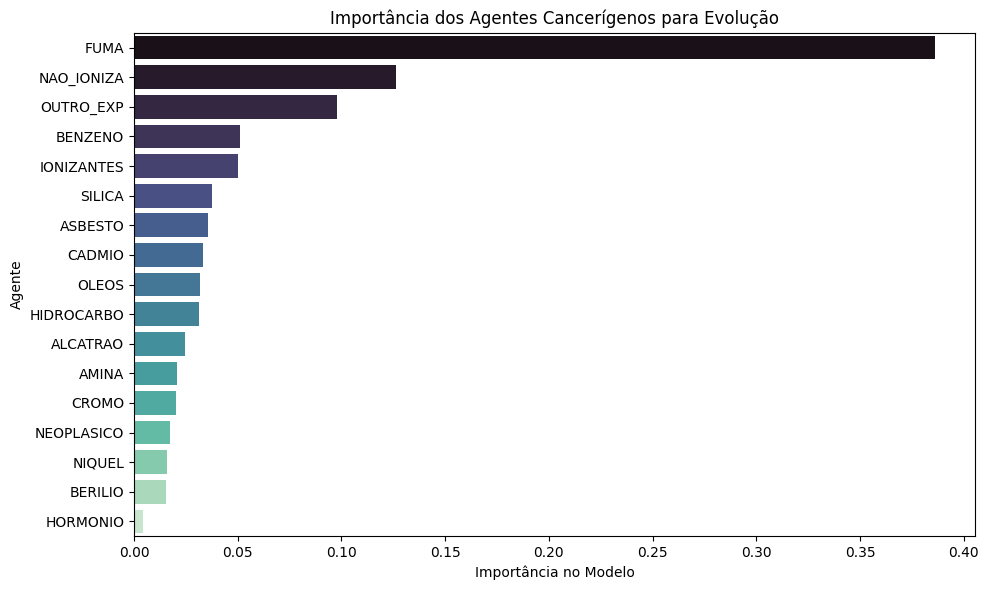

Importância dos agentes cancerígenos:
        Agente  Importância
16        FUMA     0.386146
12  NAO_IONIZA     0.126440
15   OUTRO_EXP     0.097804
3      BENZENO     0.051074
11  IONIZANTES     0.050224
1       SILICA     0.037738
0      ASBESTO     0.035893
8       CADMIO     0.033216
6        OLEOS     0.031744
5   HIDROCARBO     0.031331
4     ALCATRAO     0.024560
2        AMINA     0.020616
9        CROMO     0.020016
14  NEOPLASICO     0.017482
10      NIQUEL     0.015938
7      BERILIO     0.015522
13    HORMONIO     0.004255


In [23]:
# Filtrar apenas as colunas dos agentes + variável alvo
agentes = [
    'ASBESTO', 'SILICA', 'AMINA', 'BENZENO', 'ALCATRAO',
    'HIDROCARBO', 'OLEOS', 'BERILIO', 'CADMIO', 'CROMO',
    'NIQUEL', 'IONIZANTES', 'NAO_IONIZA', 'HORMONIO',
    'NEOPLASICO', 'OUTRO_EXP', 'FUMA'
]
target_variable = "EVOLUCAO"

colunas_uteis = agentes + [target_variable]
df_agentes = df[colunas_uteis].dropna().copy()

# Codificar variáveis categóricas (caso necessário)
le = LabelEncoder()
for col in agentes:
    df_agentes[col] = le.fit_transform(df_agentes[col].astype(str))

df_agentes[target_variable] = le.fit_transform(df_agentes[target_variable].astype(str))

# Separar em X e y
X = df_agentes[agentes]
y = df_agentes[target_variable]

# Treinar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Avaliar importância
importancias = model.feature_importances_
feature_df = pd.DataFrame({
    'Agente': X.columns,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Agente', data=feature_df[feature_df['Importância'] > 0], palette='mako')
plt.title("Importância dos Agentes Cancerígenos para Evolução")
plt.xlabel("Importância no Modelo")
plt.ylabel("Agente")
plt.tight_layout()
plt.show()

# Mostrar top agentes
print("Importância dos agentes cancerígenos:")
print(feature_df[feature_df["Importância"] > 0])


In [24]:
df[df["OUT_EXP_DE"].notna() & (df["OUT_EXP_DE"].str.strip() != "")]["OUT_EXP_DE"]


1       EM INVESTIGACAO               
2       ASGROTOXICOS                  
8       TINTA                         
10      POEIRA DE TECIDO              
11      GASOLINA ,ALCOOL,DISEL        
                     ...              
2218    EXPOSICAO OCUPACAO            
2230    RISCOS FISICOS,ERGONOMICOS E  
2231    POEIRA MATERIAL DE CONSTRUCAO 
2235    RADIACAO SOLAR                
2239    RADIACAO SOLAR                
Name: OUT_EXP_DE, Length: 902, dtype: object

In [25]:
df_filtrado = df[df["OUT_EXP_DE"].notna() & (df["OUT_EXP_DE"].str.strip() != "")]
df_filtrado["OUT_EXP_DE"].to_csv("out_exp_de_filtrado.csv", index=False)


In [26]:
#trazendo de volta os outros agentes ja tratados //falta trazer ainda
dados = pd.read_csv("./out_exp_de_filtrado.csv", sep=',', encoding='ISO-8859-1')
dados.head(15)

,OUT_EXP_DE
0,EM INVESTIGACAO
1,ASGROTOXICOS
2,TINTA
3,POEIRA DE TECIDO
4,"GASOLINA ,ALCOOL,DISEL"
5,"AGROTOXICO:HERBICIDA,FUNGICIDA"
6,AGROTOXICO
7,AGROTOXICOS E INSETICIDAS
8,AGRALATICOS
9,AGROTOXICOS


In [27]:
# Lê o arquivo que você acabou de subir
df_freq = pd.read_csv('frequencia_agentes.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'frequencia_agentes.csv'

In [ ]:
frequencia = pd.read_csv('frequencia_agentes.csv')


In [ ]:
mapa_categorias = {
    'ASBESTO': 'POEIRA / PARTÍCULAS SÓLIDAS',
    'SILICA': 'POEIRA / PARTÍCULAS SÓLIDAS',
    'BENZENO': 'SOLVENTES / PRODUTOS QUÍMICOS',
    'ALCATRAO': 'OUTROS PRODUTOS QUÍMICOS E MISTOS',
    'HIDROCARBO': 'COMBUSTÍVEIS / VAPORES',
    'OLEOS': 'COMBUSTÍVEIS / VAPORES',
    'BERILIO': 'METAIS PESADOS',
    'CADMIO': 'METAIS PESADOS',
    'CROMO': 'METAIS PESADOS',
    'NIQUEL': 'METAIS PESADOS',
    'IONIZANTES': 'EXPOSIÇÃO SOLAR / RADIAÇÃO',
    'NAO_IONIZA': 'EXPOSIÇÃO SOLAR / RADIAÇÃO',
    'HORMONIO': 'OUTROS PRODUTOS QUÍMICOS E MISTOS',
    'NEOPLASICO': 'OUTROS PRODUTOS QUÍMICOS E MISTOS',
    'OUTRO_EXP': 'OUTROS PRODUTOS QUÍMICOS E MISTOS',
    'FUMA': 'FUMANTE',
    'FUMAÇA' : 'GASES',
    'AMINA': 'SOLVENTES / PRODUTOS QUÍMICOS'
}


In [ ]:
feature_df['Categoria Agrupada'] = feature_df['Agente'].map(mapa_categorias)


In [ ]:
df_junto = pd.merge(feature_df, frequencia, on='Categoria Agrupada', how='right')


In [ ]:
print(df_junto.head())

In [ ]:
categoria_df = df_junto.groupby('Categoria Agrupada')[['Importância', 'Frequência']].sum().reset_index()

# Ordenar pela importância
categoria_df = categoria_df.sort_values(by='Importância', ascending=False)

# Plotar
plt.figure(figsize=(12, 6))
sns.barplot(data=categoria_df, x='Importância', y='Categoria Agrupada', palette='viridis')
plt.title('Importância das Categorias de Agentes para Evolução')
plt.xlabel('Importância Total no Modelo')
plt.ylabel('Categoria Agrupada')
plt.tight_layout()
plt.show()

NameError: name 'df_junto' is not defined

In [ ]:
print(feature_df['Categoria Agrupada'].isna().sum())
print(feature_df[['Agente', 'Categoria Agrupada']])


0
        Agente                 Categoria Agrupada
16        FUMA                            FUMANTE
12  NAO_IONIZA         EXPOSIÇÃO SOLAR / RADIAÇÃO
15   OUTRO_EXP  OUTROS PRODUTOS QUÍMICOS E MISTOS
3      BENZENO      SOLVENTES / PRODUTOS QUÍMICOS
11  IONIZANTES         EXPOSIÇÃO SOLAR / RADIAÇÃO
1       SILICA        POEIRA / PARTÍCULAS SÓLIDAS
0      ASBESTO        POEIRA / PARTÍCULAS SÓLIDAS
8       CADMIO                     METAIS PESADOS
6        OLEOS             COMBUSTÍVEIS / VAPORES
5   HIDROCARBO             COMBUSTÍVEIS / VAPORES
4     ALCATRAO  OUTROS PRODUTOS QUÍMICOS E MISTOS
2        AMINA      SOLVENTES / PRODUTOS QUÍMICOS
9        CROMO                     METAIS PESADOS
14  NEOPLASICO  OUTROS PRODUTOS QUÍMICOS E MISTOS
10      NIQUEL                     METAIS PESADOS
7      BERILIO                     METAIS PESADOS
13    HORMONIO  OUTROS PRODUTOS QUÍMICOS E MISTOS


In [ ]:
# Filtrar agentes com importância > 0
df_plot = df_junto[df_junto['Importância'] > 0].copy()

# Ordenar por importância
df_plot = df_plot.sort_values(by='Importância', ascending=True)

# Plotar gráfico
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_plot,
    x='Importância',
    y='Agente',
    hue='Categoria Agrupada',
    dodge=False,
    palette='Set2'
)

plt.title('Importância dos Agentes Cancerígenos para Evolução (com Agrupamento)')
plt.xlabel('Importância no Modelo')
plt.ylabel('Agente')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'df_junto' is not defined